In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests
import seaborn as sns
from tqdm import tqdm_notebook
import plotly.graph_objects as go
import plotly.offline as offline
import plotly as plotly
from pprint import pprint

# Import API key
from api_keys import api_key

In [2]:
url=f'http://api.eia.gov/series/?api_key={api_key}&series_id=EMISS.CO2-TOTV-CC-TO-AL.A'
print(url)
response=requests.get(url).json()
pprint(response)

http://api.eia.gov/series/?api_key=d7c7d5a92f23e68e5710fc5cfbd273dc&series_id=EMISS.CO2-TOTV-CC-TO-AL.A
{'request': {'command': 'series', 'series_id': 'EMISS.CO2-TOTV-CC-TO-AL.A'},
 'series': [{'copyright': 'None',
             'data': [['2016', 2.21873],
                      ['2015', 2.164081],
                      ['2014', 1.929239],
                      ['2013', 1.830011],
                      ['2012', 1.777356],
                      ['2011', 2.045582],
                      ['2010', 2.110883],
                      ['2009', 1.889718],
                      ['2008', 1.998817],
                      ['2007', 1.981095],
                      ['2006', 2.215215],
                      ['2005', 1.844327],
                      ['2004', 2.154692],
                      ['2003', 2.101106],
                      ['2002', 1.992065],
                      ['2001', 2.163179],
                      ['2000', 2.24985],
                      ['1999', 2.188748],
                      ['1998', 

In [3]:
#Commercial Sector
url = "http://api.eia.gov/series/?api_key="
com_api_code1 = "&series_id=EMISS.CO2-TOTV-CC-TO-"
ec_api_code1 = "&series_id=EMISS.CO2-TOTV-EC-TO-"
trans_api_code1 = "&series_id=EMISS.CO2-TOTV-TC-TO-"
res_api_code1 = "&series_id=EMISS.CO2-TOTV-RC-TO-"
ind_api_code1 = "&series_id=EMISS.CO2-TOTV-IC-TO-"

api_code2 = ".A"

state_abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
#Commercial Sector API call
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + com_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [5]:
# commercial create dataframe
emiss_com_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_com_df['year'] = emiss_com_df['year'].astype(int)
emiss_com_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [8]:
#Electrical Power Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + ec_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [9]:
#Because Electric Power is allocated to the other sectors, per EIA information, we ignore it from the final analysis
emiss_ec_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_ec_df['year'] = emiss_ec_df['year'].astype(int)
emiss_ec_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,55.245430
1,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,61.932375
2,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,65.062592
3,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,64.219449
4,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,66.461873
5,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,73.964577
6,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,76.711690
7,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,66.379386
8,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,81.024076
9,1980,2016,USA-AL,AL,"Electric power carbon dioxide emissions, all f...",Electric,EMISS.CO2-TOTV-EC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,85.901615


In [10]:
#Transportation Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + trans_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [11]:
emiss_trans_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_trans_df['year'] = emiss_trans_df['year'].astype(int)
emiss_trans_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,34.693718
1,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,32.907554
2,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,31.596261
3,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,31.586515
4,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,31.824413
5,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,32.296325
6,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,32.236319
7,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,31.935441
8,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,32.964470
9,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,35.632563


In [14]:
#Residential Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + res_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [15]:
emiss_res_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_res_df['year'] = emiss_res_df['year'].astype(int)
emiss_res_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,1.865646
1,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.129530
2,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,2.427884
3,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,2.187738
4,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.755202
5,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.343961
6,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.858597
7,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,2.495623
8,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,2.528950
9,1980,2016,USA-AL,AL,"Residential carbon dioxide emissions, all fuel...",Residential,EMISS.CO2-TOTV-RC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,2.374509


In [17]:
#Industrial Sector
start = []
end = []
f = []
geo = []
state = []
name = []
sector = []
series_id = []
source = []
units = []
units_short = []
updated = []
year = []
emission = []
data = []
count_st = 0

for st in state_abb:
        query_url = url + api_key + ind_api_code1 + st + api_code2
        count_st = count_st + 1
        print("Processing Record " + str(count_st) + " | " + st)

        emiss_response = requests.get(query_url).json()
        
       
        data.append(emiss_response["series"][0]["data"])
        ln = (len(data[0]))

        for i in range(0,ln):
            start.append(emiss_response["series"][0]["start"])
            end.append(emiss_response["series"][0]["end"])
            f.append(emiss_response["series"][0]["f"])
            geo.append(emiss_response["series"][0]["geography"])
            state.append(emiss_response["series"][0]["geography"].split("-")[1])
            name.append(emiss_response["series"][0]["name"])
            sector.append(emiss_response["series"][0]["name"].split(" ")[0])
            series_id.append(emiss_response["series"][0]["series_id"])
            source.append(emiss_response["series"][0]["source"])
            units.append(emiss_response["series"][0]["units"])
            units_short.append(emiss_response["series"][0]["unitsshort"])
            updated.append(emiss_response["series"][0]["updated"])
            year.append(emiss_response["series"][0]["data"][i][0])
            emission.append(emiss_response["series"][0]["data"][i][1])
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 | AL
Processing Record 2 | AK
Processing Record 3 | AZ
Processing Record 4 | AR
Processing Record 5 | CA
Processing Record 6 | CO
Processing Record 7 | CT
Processing Record 8 | DE
Processing Record 9 | FL
Processing Record 10 | GA
Processing Record 11 | HI
Processing Record 12 | ID
Processing Record 13 | IL
Processing Record 14 | IN
Processing Record 15 | IA
Processing Record 16 | KS
Processing Record 17 | KY
Processing Record 18 | LA
Processing Record 19 | ME
Processing Record 20 | MD
Processing Record 21 | MA
Processing Record 22 | MI
Processing Record 23 | MN
Processing Record 24 | MS
Processing Record 25 | MO
Processing Record 26 | MT
Processing Record 27 | NE
Processing Record 28 | NV
Processing Record 29 | NH
Processing Record 30 | NJ
Processing Record 31 | NM
Processing Record 32 | NY
Processing Record 33 | NC
Processing Record 34 | ND
Processing Record 35 | OH
Processing Record 36 | OK
Processing Record 37 | OR
Processing Record 38 | PA
Processing Record 39 

In [18]:
#Industrial df
emiss_ind_df = pd.DataFrame({
   "start":start,
   "end":end,
   "geo": geo,
   "state": state,
   "name": name,
   "sector": sector,
   "series_id": series_id,
   "source": source,
   "units": units,
   "units_short": units_short,
   "updated": updated,
   "year": year,
   "emission": emission
})

emiss_ind_df['year'] = emiss_ind_df['year'].astype(int)
emiss_ind_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,21.064775
1,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,21.009273
2,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,22.145826
3,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,21.084804
4,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,21.382183
5,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,19.279592
6,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,18.849930
7,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,17.400034
8,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,21.111830
9,1980,2016,USA-AL,AL,"Industrial carbon dioxide emissions, all fuels...",Industrial,EMISS.CO2-TOTV-IC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,21.540470


In [19]:
com_ind_df= pd.merge(emiss_com_df, emiss_ind_df, how = 'outer')
com_ind_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,2.218730
1,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,2.164081
2,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,1.929239
3,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,1.830011
4,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,1.777356
5,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,2.045582
6,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,2.110883
7,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,1.889718
8,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,1.998817
9,1980,2016,USA-AL,AL,"Commercial carbon dioxide emissions, all fuels...",Commercial,EMISS.CO2-TOTV-CC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,1.981095


In [20]:
trans_res_df= pd.merge(emiss_trans_df,emiss_res_df, how = 'outer')
trans_res_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,34.693718
1,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,32.907554
2,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,31.596261
3,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,31.586515
4,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,31.824413
5,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,32.296325
6,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,32.236319
7,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,31.935441
8,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,32.964470
9,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,35.632563


In [21]:
allsectors_df= pd.merge(trans_res_df, com_ind_df, how = 'outer')
allsectors_df

,start,end,geo,state,name,sector,series_id,source,units,units_short,updated,year,emission
0,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2016,34.693718
1,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2015,32.907554
2,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2014,31.596261
3,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2013,31.586515
4,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2012,31.824413
5,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2011,32.296325
6,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2010,32.236319
7,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2009,31.935441
8,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2008,32.964470
9,1980,2016,USA-AL,AL,"Transportation carbon dioxide emissions, all f...",Transportation,EMISS.CO2-TOTV-TC-TO-AL.A,"EIA, U.S. Energy Information Administration",million metric tons CO2,mmt CO2,2018-12-12T09:19:26-0500,2007,35.632563


In [22]:
#pd.DataFrame({"Total Emissions": tot_10emission_stsector})
#tot_10emission_stsector.reset_index()
tot_10emission_stsector = allsectors_df[allsectors_df["year"] >= 2006].groupby(["sector","state"])["emission"].sum()
tot_10emission_stsector = pd.DataFrame({"Total Emissions": tot_10emission_stsector})
tot_10emission_stsector

Total Emissions
sector         state                 
Commercial     AK           26.357681
               AL           22.160727
               AR           27.881309
               AZ           26.146019
               CA          176.917525
               CO           43.362027
               CT           39.013542
               DE            8.605971
               FL           58.607036
               GA           42.111519
               HI            2.909925
               IA           44.710130
               ID           12.633425
               IL          138.549989
               IN           58.927490
               KS           22.367657
               KY           26.831488
               LA           21.579416
               MA           68.474682
               MD           52.376342
               ME           19.776864
               MI          111.365368
               MN           68.123669
               MO           46.155552
               MS           16.708428
               MT           13.392071
               NC           52.048181
               ND           11.973963
               NE           20.478592
               NH           14.980881
...                               ...
Transportation ME           94.482270
               MI          547.355772
               MN          352.288390
               MO          425.775813
               MS          283.667772
               MT           88.438517
               NC          542.412232
               ND           85.727793
               NE          145.189513
               NH           75.954795
               NJ          691.455871
               NM          155.872225
               NV          164.737088
               NY          785.158286
               OH          715.185804
               OK          346.445394
               OR          238.323429
               PA          704.321511
               RI           44.938027
               SC          340.241501
               SD           70.741665
               TN          466.426027
               TX         2220.771560
               UT          187.601691
               VA          553.889026
               VT           38.093213
               WA          474.225091
               WI          322.526627
               WV          126.315958
               WY           89.110303

[200 rows x 1 columns]

<IPython.core.display.Javascript object>


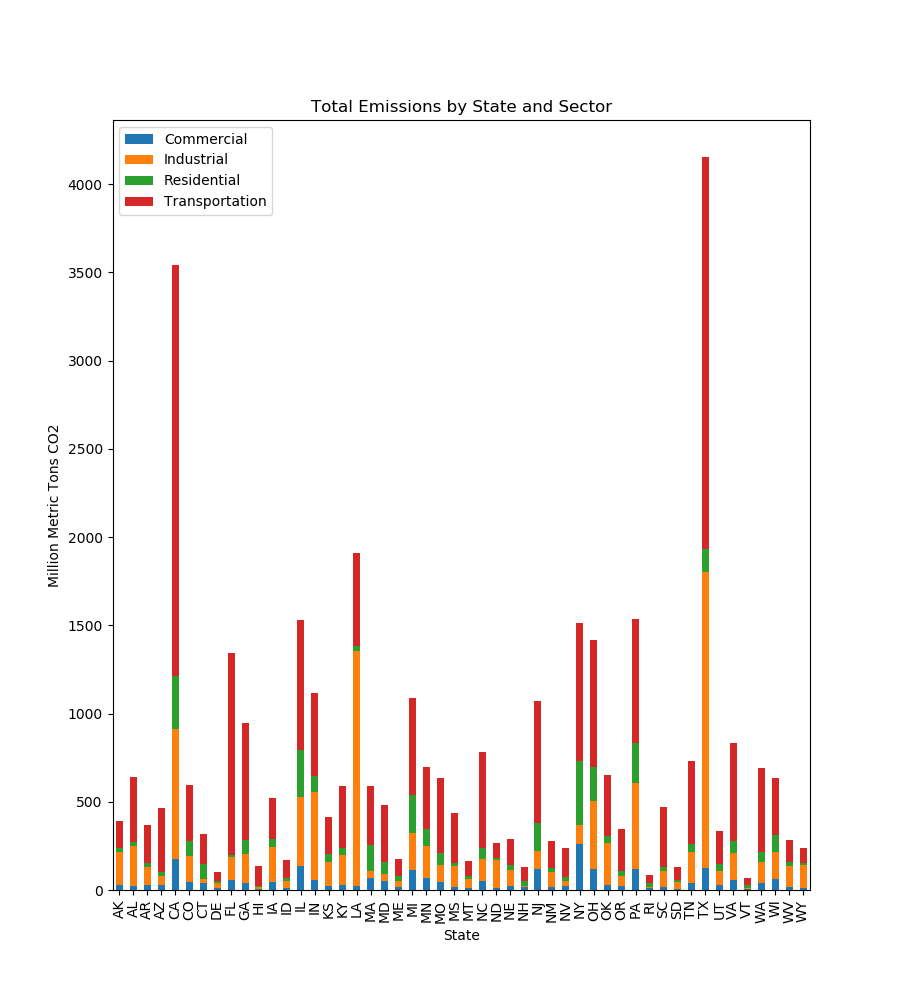

In [28]:
#Grap for sector by state
stateplot=tot_10emission_stsector.unstack(level=0).plot(kind='bar', stacked=True, 
                                                        title="Total Emissions by State and Sector", figsize=(9,10))

stateplot.legend(["Commercial","Industrial","Residential","Transportation"])
stateplot.set_xlabel("State")
stateplot.set_ylabel("Million Metric Tons CO2")

plt.savefig('images/EmissionsbyStateandSector.png')

In [29]:
state_tot_10emissions = allsectors_df[allsectors_df["year"] >= 2006].groupby(["state"])["emission"].sum()
state_tot_10emissions = state_tot_10emissions.reset_index()
state_tot_10emissions

,state,emission
0,AK,392.654242
1,AL,637.607135
2,AR,365.916401
3,AZ,466.135157
4,CA,3538.905385
5,CO,594.730258
6,CT,318.833321
7,DE,99.213514
8,FL,1345.583576
9,GA,946.445686


In [32]:
#CO2 Emissions by State Since 2006
fig = go.Figure(data=go.Choropleth(
    locations=state_tot_10emissions['state'], 
    z = state_tot_10emissions['emission'].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Millions Metric Tons CO2",
))

fig.update_layout(
    title_text = 'CO2 Emissions by State Since 2006',
    geo_scope='usa', # limits map scope to USA
)
plotly.io.write_image(fig, file='images/statesheatmap.png', format='png')
fig.show()

In [33]:
sector_emiss_10years = allsectors_df.set_index("state","sector").groupby(["state","sector"])

sector_tot_10emissions = allsectors_df[allsectors_df["year"] >= 2006].groupby(["sector"])["emission"].sum()

sector_10yrs_df = sector_tot_10emissions.reset_index()

sector_10yrs_df

,sector,emission
0,Commercial,2432.249109
1,Industrial,9949.992924
2,Residential,3594.576899
3,Transportation,20556.149409


<IPython.core.display.Javascript object>


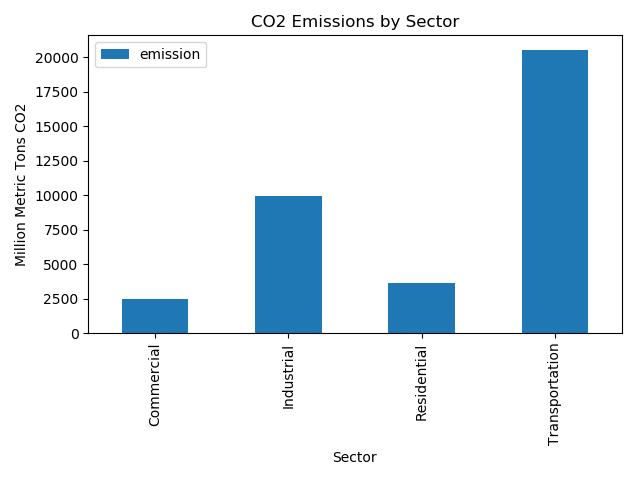

In [35]:
#CO2 Emissions by Sector based on State info until 2016
sector_chart = sector_10yrs_df.plot(x='sector', y='emission', kind="bar", title="CO2 Emissions by Sector")
sector_chart.set_xlabel("Sector")
sector_chart.set_ylabel("Million Metric Tons CO2")

plt.show()
plt.tight_layout()
plt.savefig('images/CO2EmissionsbySectorO.png')